# Censoring and Truncation
### This chapter accompanies Long, Chapter 7

When we discussed the truncated poisson model, I noted that in many circumstances we observe a dataset that is truncated. Truncation means we only have data that fall above or below a particular value of the dependent variable. I used the example of ideology: say I want to estimate the impact of ideology on dollars spent during an election cycle. I only have data among those who spend at least 50,000 dollars. The data are truncated. I've excluded all cases less than 50k. I have no data for these individuals -- and by no data, I mean no independent or dependent variables.

Why might this be a limitation? Well, those who spend less may be more ideologically extreme, thus not convering on the median voter. Thus, perhaps we do not observe the full range of ideological scores, nor do we fully capture the relationship between ideology and spending (if, perhaps, ideologically extreme candidates get disproportionately less campaign donations).

Truncation means the data itself are fundamentally changed by the truncation process. We simply do not have data for candidates who spend less than 50,000 dollars. Constrast this to **censoring**, which involves missing data for a dependent variable, but complete data for the covariates. Applied to the election example, say I have the ideology scores for all candidates, but I do not have spending data if the candidate spent less than 50,000 dollars. Thus, censoring does not alter the composition of the data; I have access to the exact same set of observations, even though the data are missing on $y$.

Fundamentally, this is a missing data issue. Say I don't observe any value of the dependent variable if the dependent variable is less than $\tau$. 

$\bullet$ $y_{observed} = NA$, if $y_{latent}\leq\tau\$ 

$\bullet$ $y_{observed} = y_{latent}$, if $y_{latent}>\tau\$

If I also observe that $x_{k}=NA$, when $y_{latent}\leq\tau$ then I have truncation. If, however, I observe $x_{k}\neq NA$, when $y_{latent}\leq\tau$ then I encounter censoring.

This type of thing often occurs in circumstances with non-random selection. Perhaps we are constructing our own dataset and cannot observe the full range of outcomes. Truncation and censoring --while they have statistical solutions -- are primarily a research design, data collection issue.

Take the classic example offered by James Tobin (1958). Assume the dependent variable is the amount of money spent on a new car. Let's also assume everyone has income, and they have a set dollar price that they will spend on the car. If the car is priced more than this value, they cannot buy the car (even though they would like to buy the car). We only observe car purchases if the cost of the car is less than the amount the person is willing to spend. In short, for all people who have a value less than this threshold, we observe missing data.

We could simply drop these people and estimate a regression line predicting spending with income. The problem is that we will underestimate the slope and overestimate the intercept. That is, we over-estimate what lower income people would spend on a car. The reason we will oberve bias is that the expected values of the errors will no longer equal zero. 

People tend to forget that truncation and censoring is a very real issue in applied settings. As this example suggests, multivariate statistics does not solve the problem, and we are left with the problem of bias in our models.

Really, the problem is related to the notion of missing data, which we will spend the next few weeks discussing. In the case of censoring and truncation, we have data that are systematically missing and the missing data are said to be **non-ignorable**. They aren't missing by some randomly generated process; they are instead systematically missing by being observed above or below a threshold. 

Let's fully parse why this matters. I'll present the \emph{why} in several different ways. First, we'll look at simulated data, and will explore the issues involved in censoring and truncation and how the problem cascades across the classical regression model. Next, we'll consider the problem from the perspective of missing data and I'll demonstrate that the process of missing data regarding censoring and truncation is non-ignorable. 

Finally, we'll see what consequences missing data has in terms of univariate statistics. I'll spend a fair amount of time on the truncated normal, which serves as a valuable foundation to establish the multivariate solutions we will discuss next week.


## Why It Matters

Let's examine why this is important in a synthetic example. Let's draw 1000 values of x from a standard normal density and define y by regression coefficients corresponding to 1 and a normally distributed error process.






Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.4959  -3.3545  -0.0142   3.4547  19.9936 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.91821    0.04974   18.46   <2e-16 ***
x            1.03828    0.05064   20.50   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.974 on 9998 degrees of freedom
Multiple R-squared:  0.04035,	Adjusted R-squared:  0.04025 
F-statistic: 420.3 on 1 and 9998 DF,  p-value: < 2.2e-16



Call:
lm(formula = y.truncate ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9776 -2.9022 -0.5426  2.4084 17.6488 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.01998    0.04242   71.19   <2e-16 ***
x            0.56376    0.04354   12.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.663 on 7498 degrees of freedom
  (2500 observations deleted due to missingness)
Multiple R-squared:  0.02187,	Adjusted R-squared:  0.02174 
F-statistic: 167.6 on 1 and 7498 DF,  p-value: < 2.2e-16


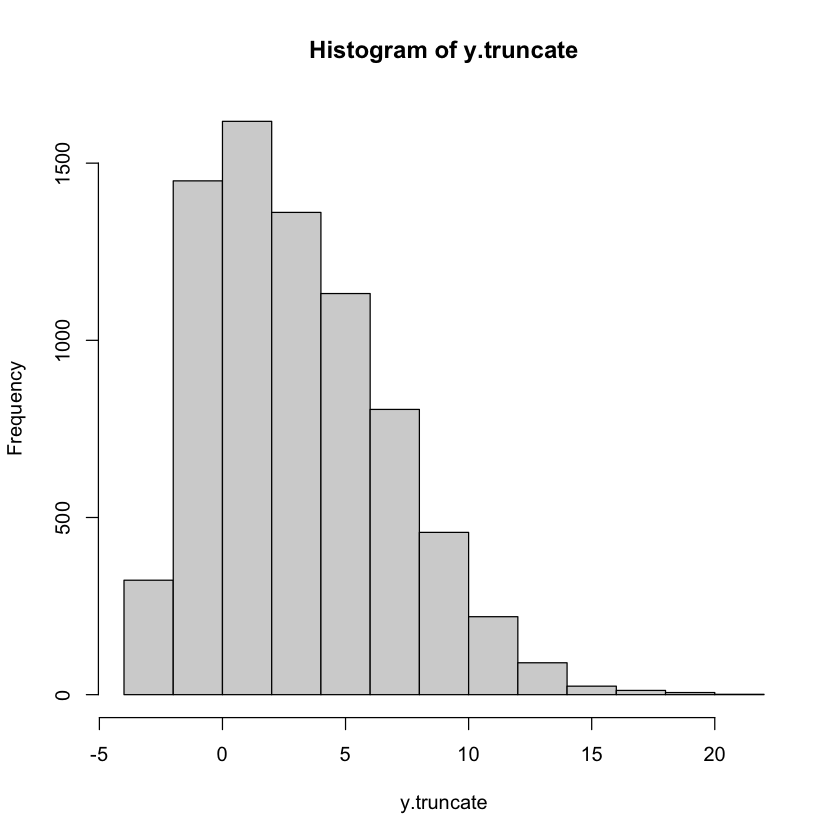


Call:
lm(formula = y.censored ~ x)

Residuals:
   Min     1Q Median     3Q    Max 
-6.426 -2.447 -1.113  2.147 18.484 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.21654    0.03505   63.24   <2e-16 ***
x            0.62569    0.03569   17.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.505 on 9998 degrees of freedom
Multiple R-squared:  0.02983,	Adjusted R-squared:  0.02973 
F-statistic: 307.4 on 1 and 9998 DF,  p-value: < 2.2e-16


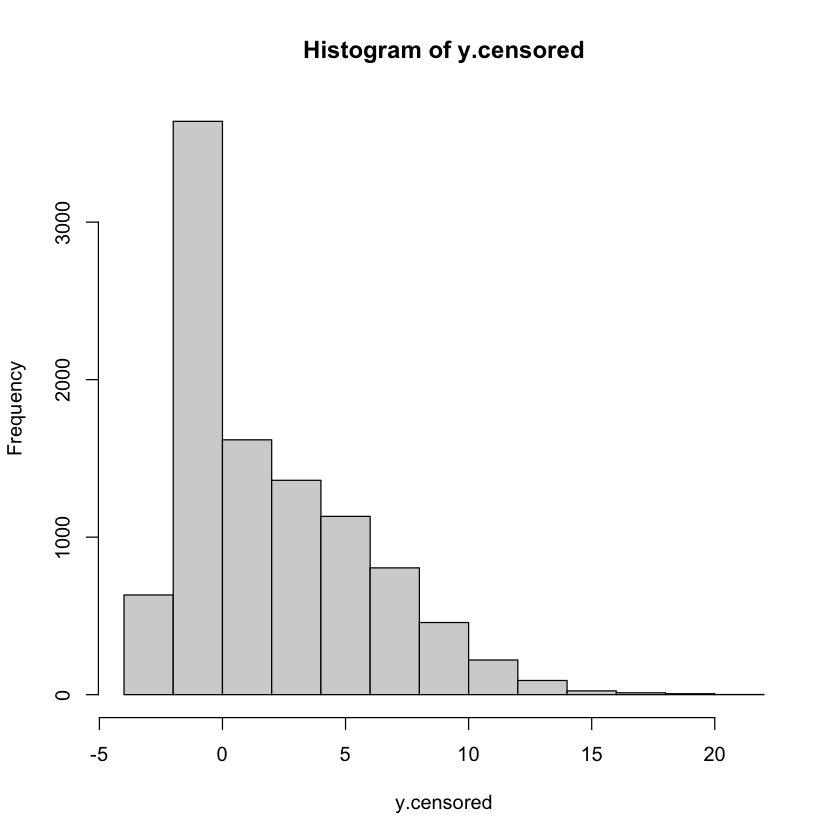

In [7]:
require(dplyr)
x <- rnorm(10000, 0, 1)
y <- 1+1*x+rnorm(10000,0,5)
summary(lm(y~x))  ##True Regression Line

y.truncate<-ifelse(y < quantile(y, 0.25), NA, y)
hist(y.truncate)
summary(lm(y.truncate~x))  ##Truncated regression


y.censored<-ifelse(y < quantile(y, 0.25), 0, y)
hist(y.censored)
summary(lm(y.censored~x))  ##Censored regression



In both cases, I'm underestimating the intercept and the slope. If I were to just ignore censoring, and proceed as if it wasn't a concern, I would be incorrectly estimating the true relationship between the variables.

## Ignorability

When we think about truncation or censoring, notice this is a missing data problem. Our data are systematically missing for particular values. At this point, let's more thoroughly consider the process that produces our data. Following Gelman et al (2014), assume we have a complete data set, $y_{complete}$; though let's assume that some values of $y$ are missing. We don't know if these values are systematically missing, but we have a vector of missing and non-missing values $y_{observed}$ and $y_{miss}$. Let's assume that we then create an indicator, coded 1 if missing and 0 if observed. Now, $I \in (0,1)$.

Often, we assume what is called "ignorability" in our data. Data simply means we may safely ignore, or not model, the mechanism that produced the data (Gelman et al 2014, p.). Ignorability -- which is suspect in the truncated or censored data -- can be decomposed into two things, though here we only need consider 1 (the other will come in the missing data week).

$\star$ Data are missing at random (MAR) when:

$$p(I|x,y,\phi)=p(I|x,y_{observed},\phi)$$

Here, $\phi$ represents the parameters that generate the missing data. MAR simply means that the only factors that predict missingness stem from the data and the parameters linking the data to missingness. In other words, we can reasonably predict the outcome missingnes indicator with the full data set. But the problem is that sometimes (often?) this is untenable.  

Borrowing Gelman et al's (2014) example, consider income and tax auditing. We want to predict how well income predicts the likelihood of being audited. Now, assume that only people who make more than 10 million are audited.

Because I know exactly who is missing by the research design. Then,

$$p(I|x,y,\phi)=p(I|x,y_{observed},\phi)$$

which reads: Conditional on the data, I know the probability a data point is missing. MAR does not mean that the data are missing conditional on a single variable; it means that given the observed $y$ and x(s), along with a set of parameters, we know the the probability of the full data set.

Now considering truncation and censoring, note why ignorability shouldn't hold. The data are systematically missing by being greater (or less) than $\tau$. Only conditional on $\tau$ will ignorability hold.

This has the consequence of an error term that has a non-zero mean; or you might think about this as errors are correlated with predictor variables. In both cases, we observe that the estimates are both biased and inconsistent.

## Distributions
Part of the problem with the above examples is that I am assuming normally distributed errors; yet the errors are not normal, if I'm systematically deleting or partitioning observations to be a certain value. It's most useful to thin about censoring and truncation in terms of latent variables. If we assume that, 

## Truncation

$\bullet$ $y_{observed} =  NA$, when $y_{latent}\leq\tau$


$\bullet$ $y_{observed} =  y_{latent}$, when $y_{latent}>\tau$

## Censoring

$\bullet$ $y_{observed} =  \tau$, when $y_{latent}\leq\tau$


$\bullet$ $y_{observed} =  y_{latent}$, when $y_{latent}>\tau$


## Truncation Solutions


We can also assume that $y_{latent}\sim N(\mu, \sigma^2)$. Thus, the pdf for $y_{latent}$ is simply the normal density.

$f(y_{latent}|\mu, \sigma)={{1}\over{\sigma}}\phi({{\mu-y_{latent}}\over{\sigma}})$

And the cdf is 

$$pr(Y_{latent}>y_{latent})=\Phi({{\mu-y_{latent}}\over{\sigma}})$$

But, if we only observe the latent variable when it is above or below a threshold, $\tau$, we cannot assume that $y_{observed}$ is normally distributed. Instead, we need to model the conditional probability of $y$ given it is above (or below) $\tau$. Just as we did with the truncated poisson density, we simply divide the pdf by the cdf, evaluated from $\tau$ to $\infty$.

So, if we only observe data greater than $\tau$, then,

$$pr(y|y>\tau, \mu, \sigma)={{f(y_{latent}|\mu \sigma)}\over{pr(y_{latent}>\tau)}}$$

If we only observe data less than $\tau$, then,

$$pr(y|y<\tau, \mu, \sigma)={{f(y_{latent}|\mu \sigma)}\over{pr(y_{latent}<\tau)}}$$

We're again calculating a conditional probability; what is the probability of observing $y$ given that $y$ exceeds the truncation point. Just as was the case with the truncated poisson, this involves essentially repartitioning the truncated portion of the distribution. In the context of a truncated normal (it need not be normal, we can do this with other densities), then:

$${f(y|y>\tau, \mu, \sigma)}= [{{{1}\over{\sigma}}{\phi({{\mu-y_{latent}}\over{\sigma}})}}]/[{{{\Phi({{\mu-\tau}\over{\sigma}})}}}]$$


Stare at this a bit to realize what we are doing. The numerator is simply the normal pdf, but we are dividing by the normal cdf evaluated for the distribution greater than $\tau$. Another way to see this is swap the denominator with $1-\Phi{{\tau-\mu}\over{\sigma}}$. The part to the right of $1-$ is simply the area to the ``left'' of $\tau$; yet, we need the remaining area, so we subtract that number from 1.

Let's take the expectation of this pdf, as it yields an important statistic.

$${E(y|y>\tau)}=\mu+\sigma {{\phi{{\mu-\tau}\over{\sigma}}}\over{\Phi{{\mu-\tau}\over{\sigma}}}}$$

Or, just simply, $\mu+\sigma \kappa {{\mu-\tau}\over{\sigma}}$, with $\kappa$ representing, $\phi(.)/\Phi(.)$. In this case, $\kappa$ is a statistic called the inverse Mill's ratio.

Take the part in the parentheses. The numerator is the density evaluated at ${{\mu-\tau}\over{\sigma}}$. The denominator is the probability from $\tau$ to $\infty$ (for truncation from below).

What does this mean? If $\tau$ is greater than $\mu$, meaning we would have pretty serious truncation, then this ratio will be larger. Notice how the denominator gets smaller But, if $\mu$ is much greater than $\tau$ -- that is, we don't have much truncation -- this ratio goes to zero and the truncated normal is the normal.





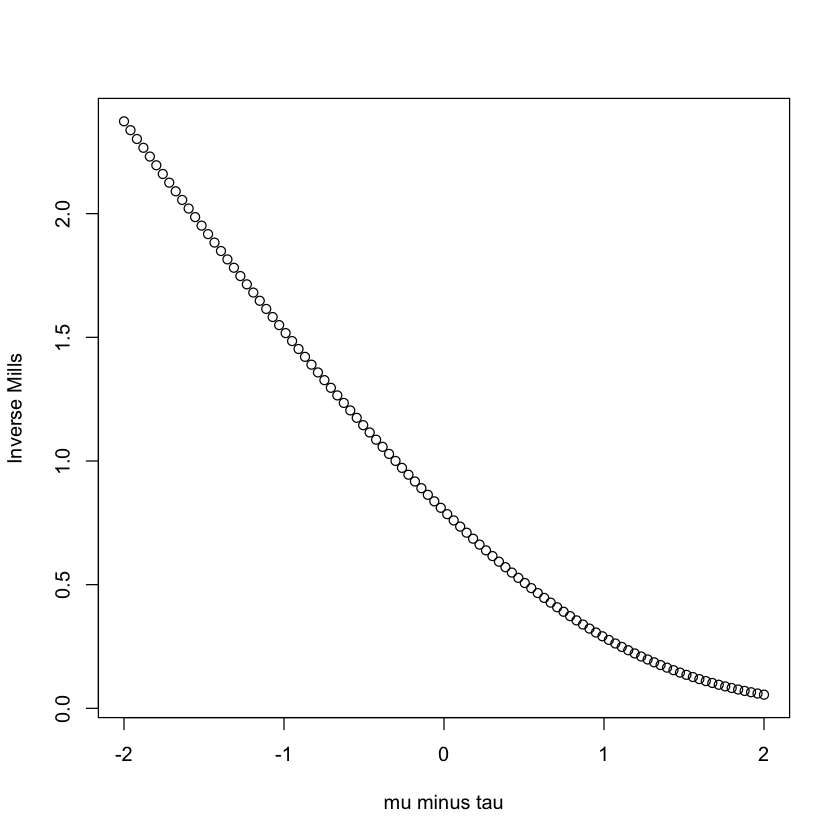

In [8]:
mills.function<-function(x){
  return(dnorm(x,0,1)/pnorm(x, 0,1))
}
plot(seq(-2,2, length=100), mills.function(seq(-2,2, length=100)),
     xlab="mu minus tau", ylab="Inverse Mills")

If $\mu$ is greater than $\tau$ (positive numbers), the inverse Mills ratio is smaller than when 
$\mu$ is less than $\tau$ (negative numbers).

## Censored Regression

Let's start by assuming a censored dependent variable. See Long (1997, pp. 195-196) for the full derivation. As noted by Long, we observe all of $x$ but we don't observe $y$. 

$$y_{observed} = 
  \begin{array}{lr}
    \tau, y_{latent}\leq\tau\\
    y_{latent}, y_{latent}>\tau\\
      \end{array}
$$

This is censoring from below. We can also have censoring from above.


$$y_{observed} = 
  \begin{array}{lr}
    \tau, y_{latent}\geq\tau\\
    y_{latent}, y_{latent}<\tau\\
  \end{array}
$$

Let's use the ``below'' formulation, but note the same general findings hold for censoring from above.

$$y_{observed} = 
  \begin{array}{lr}
    \tau, y_{latent}\leq\tau\\
    \alpha+\sum_K \beta_k x_{k}+\epsilon, y_{latent}>\tau\\
  \end{array}
$$

Let's use the ``below'' formulation, but note the same general findings hold for censoring from above.

$$\[y_{observed} = \left\{
  \begin{array}{lr}
    \tau, y_{latent}\geq\tau\\
    \alpha+\sum_K \beta_k x_{k}+\epsilon, y_{latent}<\tau\\
  \end{array}
\right.
\]$$

$$pr(censored|x)=pr(y_{latent}\leq\tau|x)=pr(\alpha+\sum_K \beta_k x_{k} + \epsilon \leq \tau|x)$$

Which is $$pr(\epsilon\leq \tau-(\alpha+\sum_K \beta_k x_{k})|x)$$. Note that $\epsilon/\sigma \sim N(0,1)$. So, $$pr(\epsilon/\sigma\leq *\tau-(\alpha+\sum_K \beta_k x_{k})/\sigma)|x)$$.

## Probability of Censoring

$$\Phi({{\tau-(\alpha+\sum_K \beta_k x_{k})}\over{\sigma}})$$

This is the probability that a data point is censored. Now, what about an observation being not censored?

$$1-\Phi({{\tau-(\alpha+\sum_K \beta_k x_{k})}\over{\sigma}})=\Phi({{(\alpha+\sum_K \beta_k x_{k})-\tau}\over{\sigma}})$$

The expectation then is conditional upon whether an observation is censored,

$$E(y|x)=pr(censored|x) \times E(y|y_{latent}\leq \tau)+pr(uncensored|x) \times E(y|y_{latent}> \tau)$$

This is fairly simple to calculate. First, let's start with $pr(censored)$. This is just the CDF evaluated at $\tau$ multiplied by $\tau$.

$$pr(censored|x) \times E(y|y_{latent}\leq \tau)=\Phi({{\tau-(\alpha+\sum_K \beta_k x_{k})}\over{\sigma}})\tau$$

And,

$ mu_i = E(y|x, y>\tau) = \alpha+\sum_K \beta_k x_{k} $

$$pr(uncensored|x) \times E(y|y_{latent}> \tau)=\Phi({{(\alpha+\sum_K \beta_k x_{k})-\tau}\over{\sigma}})(\alpha+\sum_K \beta_k x_{k}+\sigma \kappa ({{\alpha+\sum_K \beta_k x_{k})-\tau}\over{\sigma}})$$

$\kappa$ is the inverse mill's ratio. Note how this is identical to the expected value in the truncated distribution! This is just the uncensored part. This model is called the tobit model. Notice the similarity to the probit. The only real difference is the measurement part of the model. We don't need to worry about mapping the latent variable to a 1/0 realization. Instead, we observe $y_{latent}$ directly, but only for certain regions of the distribution.

## The Log-Likelihood 

The likelihood equation is just a variant of the linear equation. Remember this from early in the semester. It is,

$$pr(y|\beta, \sigma^2)=\prod 1/\sigma \phi({{y-(\alpha+\sum_K \beta_k x_{k})}\over{\sigma}})$$

This is the likelihood of an uncensored observation. Long (1997, 205) shows how the likelihood is a combination of the linear and censored observations. In particular, he shows,

$$pr(y_{latent}\leq \tau|x)=\Phi({{\tau-(\alpha+\sum_K \beta_k x_{k})}\over{\sigma}})$$

Thus, the joint probability of a censored observation is

$$\prod \Phi({{\tau-(\alpha+\sum_K \beta_k x_{k})}\over{\sigma}})$$

Since some observations are censored, others are not, then combining these to calculate the joint probability of censored and uncensored observations, 

$$\prod \Phi({{\tau-((\alpha+\sum_K \beta_k x_{k})}\over{\sigma}}) \prod (1/\sigma) \phi({{y-(\alpha+\sum_K \beta_k x_{k})}\over{\sigma}})$$

Take logs,

$$\sum ln(\Phi({{\tau-(\alpha+\sum_K \beta_k x_{k})}\over{\sigma}}) )+\sum ln( (1/\sigma) \phi({{y-(\alpha+\sum_K \beta_k x_{k})}\over{\sigma}})$$

## Extensions

The tobit model may be extended to censoring from above, or censoring from above and below. I won't reproduce the formula here, as it is just an extension of the simpler censoring model. Pp. 211-214 of your book explain these variations. In the case of censoring from above, we just need to flip the formula to note whether an observation is censored. For the double censored model (e.g., feeling thermometer questions), we just write

$$pr(y|\beta, \sigma^2)=\prod{{1/\sigma \phi({{y-(\alpha+\sum_K \beta_k x_{k})}\over{\sigma}})}
\over
{\phi({{\tau-(\alpha+\sum_K \beta_k x_{k})}\over{\sigma}})}}$$

And, the logarithm

$$pr(y|\beta, \sigma^2)=\sum ln[{{1/\sigma \phi({{y-(\alpha+\sum_K \beta_k x_{k})}\over{\sigma}})}]-
ln[{\phi({{\tau-(\alpha+\sum_K \beta_k x_{k})}\over{\sigma}})}}]$$


A number of methods can be used to estimate censored and truncated regression models. For censored regression, try the \texttt{vglm} package. For truncated or censored regression, I find \texttt{stan} to be particularly powerful. The manual includes a brief vignette explaining these models, which can very easily be applied to censoring from above and below, as well as truncation at particular points. 

## Sample Selection Models

The tobit can be applied to a model that allows for censoring when the censoring threshold is different for each individual (Long 1997, p. 214). Think of the case of graduate or college admissions. Although departments/universities set some rigid thresholds, often, multiple pieces of information are used that result in fuzzy boundaries. Think about the GRE and graduate school admissions. Occassionally, a low quantitative score still leads to admittance, if the candidate has shown sufficient progress in a quantitative program, has good recommendation letters, and/or scores high on other components of the test. If we were then going to evaluate the performance of a randomly selected group of young adults who have applied to a graduate school program, and we are interested in the relationship between graduate school grades and income -- this leads to a censored data set. 

Let's start by -- just as before -- assuming an indicator coded 1 if the unit is selected into the sample (i.e., admitted) and 0 if the unit is not. We also observe the relationship of admitted students with respect to income and grades. It's useful to partition what is called a Heckman sample selection model into two steps.

In the first step, let's predict $v_i$, the probability of being admitted into graduate school.  

$$v_i=(\gamma+\sum_K \gamma z_{k}+\epsilon_1)$$

using a logit or probit model where (again) a threshold of zero is required for identification. $z_k$ represents a set of independent variables that predict the probability of being admitted (e.g., undergraduate GPA, GRE). Then, we might define the **outcome** equation as:

$$y_i=(\beta+\sum_K \beta x_{k}+\epsilon_2)$$

The problem is that the error term for the outome equation is only observed for admitted students, $E(\epsilon_2|v_i=1)$. Meaning: $E(\epsilon_2|\gamma+\sum_K \gamma z_{k}+\epsilon_1)>0$, which is $E(\epsilon_2|-\epsilon_1>\gamma+\sum_K \gamma z_{k}+\epsilon_1$). The key takeaway here is that the outcome error is conditional upon the selection error. Let's assume the errors are drawn from a bivariate normal. The correlation between the errors is:

$$cor(\epsilon_1, \epsilon_2)={{\phi(\gamma+\sum_K \gamma z_{k})}\over{\gamma+\sum_K \gamma z_{k}}}$$

If we are dealing with the logit or probit, for the selection equation, we need to make an assumption about the scale of the latent variable (in this case, the latent variable is the probability of being selected into the sample). What this means is that 

$$cov(\epsilon_1, \epsilon_2)=cor(\epsilon_1, \epsilon_2)$$.

The covariance is the correlation. The expected value for a sample selected outcome is then,

$$E(y_i | v_i=1, x_k)=\alpha+\sum_K \beta x_{k}+cov(\epsilon_1, \epsilon_2){{\phi(\gamma+\sum_K \gamma z_{k})}\over{\Phi(\gamma+\sum_K \gamma z_{k})}}$$

You should notice something here -- first, if the selection model is independent of the outcome model (there isn't something that systematically affects both selection and outcome), then the expected value of $y_i$ is just the linear regression estimates. Why?

Second, the part on the right of the expression is the inverse Mill's ratio (again). You should now see this is essential to understand when dealing with censored or truncated data.

Third, if you ignore the rightmost portion of the equation and estimate an OLS, the product of the error correlation and inverse Mill's ratio is saturated into the error term. This will produce a non-zero correlation between the independent variables and the error. Why? What are the consequences? 

Fourth, if the inverse Mill's ratio is small, then even with a substantial correlation between the errors, the selection model will approximate the linear regression.


### Some Examples

In [2]:
#@title Load Data
install.packages('survey')
library(dplyr)
library(MASS)
library(ggplot2)
library(survey)
clean_data=as.matrix(read.table("https://raw.githubusercontent.com/crweber9874/APL/data/report.txt"), header = TRUE)  %>% as.data.frame()


The downloaded binary packages are in
	/var/folders/t5/z6n7fqts5sldmfy1m6f9myqr0000gs/T//RtmpwcXtmb/downloaded_packages



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: grid

Loading required package: Matrix

Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:brms’:

    kidney



Attaching package: ‘survey’


The following object is masked from ‘package:graphics’:

    dotchart





Call:
lm(formula = dv ~ iv)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.867 -24.152   0.848  22.133  75.848 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -2.705      2.034   -1.33    0.184    
iv            26.857      0.897   29.94   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.95 on 1142 degrees of freedom
Multiple R-squared:  0.4398,	Adjusted R-squared:  0.4393 
F-statistic: 896.4 on 1 and 1142 DF,  p-value: < 2.2e-16


iv
  1   2   3 
406 233 505 

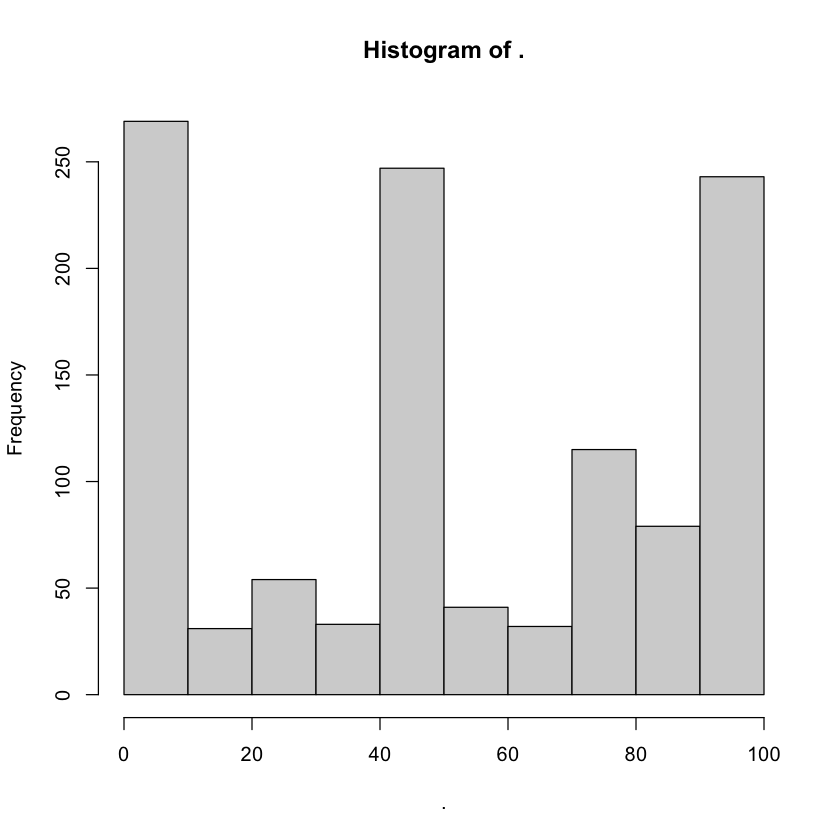

In [8]:
clean_data$rep_ft_people %>% as.numeric() %>% hist()
dv = clean_data$rep_ft_people %>% as.numeric() 
iv = clean_data$pid %>% as.numeric()

lm(dv~iv) %>% summary()

table(iv)


In [4]:
data_example =
  tibble(
    y = dv,
    censor = ifelse(dv==0, 'right', 
                    ifelse(dv==100, "left", 'none')),
    iv = iv
      )


In [5]:
data_example$censor %>% table()
head(data_example)

.
 left  none right 
  208   765   171 

y,censor,iv
<dbl>,<chr>,<dbl>
0,right,1
50,none,2
0,right,2
40,none,1
50,none,1
70,none,2


Let's just begin with a simple linear regression, ignoring censoring.

Compiling Stan program...

Start sampling




SAMPLING FOR MODEL '759523c2d7124ec15f9f54e0504bf847' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2.2e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.22 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.047356 seconds (Warm-up)
Chain 1:                0.037577 seconds (Sampling)


 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: y ~ iv 
   Data: data_example (Number of observations: 1144) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    -2.71      2.11    -6.86     1.44 1.00     4152     2635
iv           26.85      0.93    25.05    28.68 1.00     3920     2652

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma    26.97      0.55    25.92    28.07 1.00     3745     2528

Samples were drawn using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

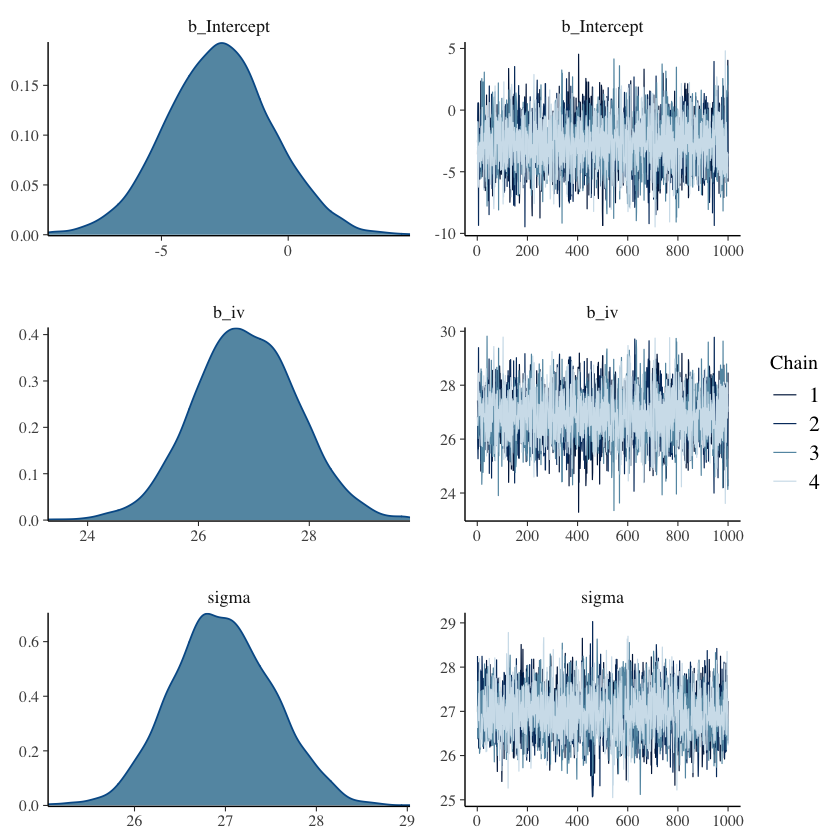

In [6]:
library(brms)
fit1 <- brm(y  ~ iv,
                data = data_example, family = gaussian
           )
    summary(fit1)
plot(fit1)

Now, let's model censoring.

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling




SAMPLING FOR MODEL '21257bcf94b8755dc4e90f3fff36f15f' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000115 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 1.15 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 1.02691 seconds (Warm-up)
Chain 1:                0.577622 seconds (Sampling)


 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: y | cens(censor) ~ iv 
   Data: data_example (Number of observations: 1144) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept    20.43      1.90    16.69    24.19 1.00     3674     2859
iv           15.42      0.84    13.78    17.03 1.00     3592     3126

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma    21.45      0.52    20.46    22.49 1.00     3778     3029

Samples were drawn using sampling(NUTS). For each parameter, Bulk_ESS
and Tail_ESS are effective sample size measures, and Rhat is the potential
scale reduction factor on split chains (at convergence, Rhat = 1).

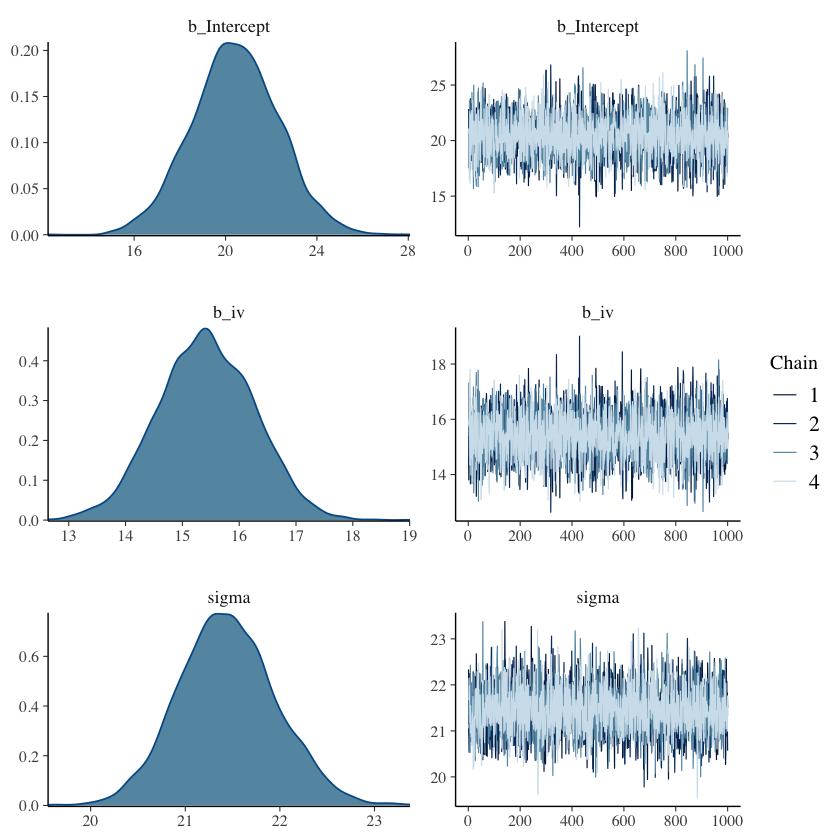

In [9]:
library(brms)
fit1 <- brm(y | cens(censor) ~ iv,
                data = data_example, family = gaussian
           )
    summary(fit1)
plot(fit1)

It's quite clear that censoring matters in this example. The partisan differences go away when accounting for the extreme categories. Just compare the two sets of results. 



## Sample Selection Models